
Regression Analysis Results:

          X_mean    Y_mean     X_std     Y_std  Correlation  Intercept  \
Dataset2     9.0  7.500909  3.316625  2.031657     0.816237   3.000909   
Dataset3     9.0  7.500000  3.316625  2.030424     0.816287   3.002455   
Dataset4     9.0  7.500909  3.316625  2.030579     0.816521   3.001727   

             Slope  R_squared  
Dataset2  0.500000   0.666242  
Dataset3  0.499727   0.666324  
Dataset4  0.499909   0.666707  


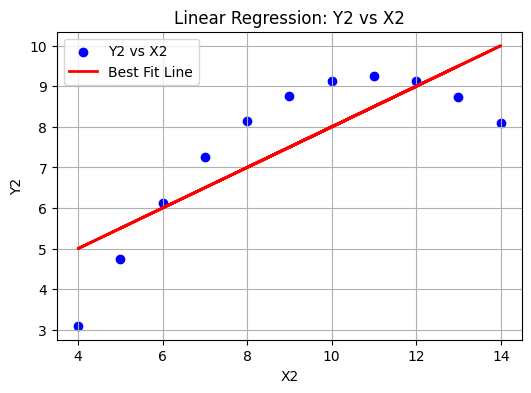

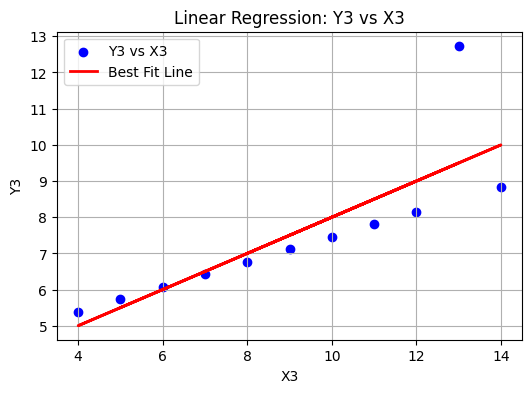

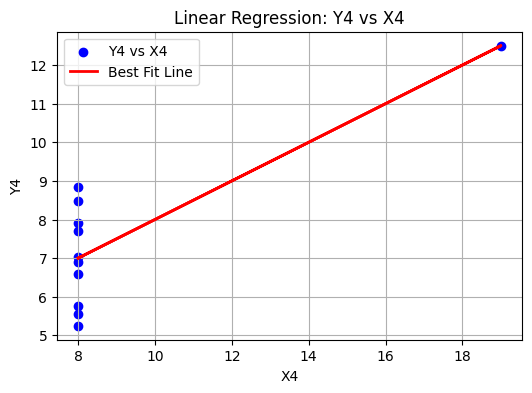

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset from CSV
df = pd.read_csv("multiple_dataset.csv")

# Function to analyze and fit regression
def analyze_dataset(X, Y, label):
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y)
    
    # Summary statistics
    summary = {
        "X_mean": np.mean(X),
        "Y_mean": np.mean(Y),
        "X_std": np.std(X, ddof=1),
        "Y_std": np.std(Y, ddof=1),
        "Correlation": np.corrcoef(X.flatten(), Y)[0, 1]
    }
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, Y)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, Y)
    
    regression_results = {
        "Intercept": intercept,
        "Slope": slope,
        "R_squared": r_squared
    }
    
    return summary | regression_results

# Run analysis for each dataset
results = {
    "Dataset2": analyze_dataset(df["X2"], df["Y2"], "Y2 vs X2"),
    "Dataset3": analyze_dataset(df["X3"], df["Y3"], "Y3 vs X3"),
    "Dataset4": analyze_dataset(df["X4"], df["Y4"], "Y4 vs X4"),
}

# Convert results to DataFrame for easy viewing
df_results = pd.DataFrame(results).T
print("\nRegression Analysis Results:\n")
print(df_results)

# Plot each dataset individually
datasets = [("X2", "Y2"), ("X3", "Y3"), ("X4", "Y4")]

for x_col, y_col in datasets:
    X = df[x_col].values.reshape(-1, 1)
    Y = df[y_col].values
    
    model = LinearRegression()
    model.fit(X, Y)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(X, Y, color="blue", label=f"{y_col} vs {x_col}")
    plt.plot(X, model.predict(X), color="red", linewidth=2, label="Best Fit Line")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Linear Regression: {y_col} vs {x_col}")
    plt.legend()
    plt.grid(True)
    plt.show()
